In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [8]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

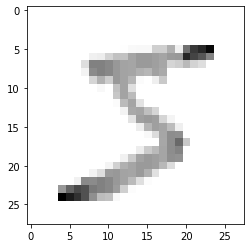

In [10]:
import matplotlib.pyplot as plt 
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [9]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [11]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))


model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 14s 240us/sample - loss: 0.2589 - accuracy: 0.9237
Epoch 2/3
60000/60000 [==============================] - 11s 188us/sample - loss: 0.1037 - accuracy: 0.9682
Epoch 3/3
60000/60000 [==============================] - 11s 188us/sample - loss: 0.0714 - accuracy: 0.9779


In [12]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

0.09308451302582398 0.9701


In [13]:
model.save('epic_num_reader.model')


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Assets written to: epic_num_reader.model/assets


In [14]:
new_model = tf.keras.models.load_model('epic_num_reader.model')
predictions = new_model.predict([x_test])
print(predictions)

[[5.78719401e-08 6.90238835e-08 1.76807171e-05 ... 9.99963880e-01
  1.28610310e-07 1.35517575e-06]
 [2.42887648e-08 1.96794004e-04 9.99787152e-01 ... 7.51295026e-09
  1.09578579e-07 9.22474770e-12]
 [1.92830115e-07 9.99788344e-01 5.95193014e-05 ... 1.19496246e-04
  2.69427273e-05 7.92557486e-08]
 ...
 [1.27731568e-07 1.33832160e-07 5.38842141e-06 ... 2.01821313e-05
  1.80730320e-04 9.03374574e-04]
 [4.98737836e-06 2.22381033e-07 1.17072458e-08 ... 8.86972273e-08
  3.30149924e-04 1.03173761e-07]
 [1.83652701e-05 1.13779649e-07 2.43276162e-07 ... 3.53621554e-09
  3.12181123e-06 5.26890815e-08]]


In [15]:
import numpy as np 
print(np.argmax(predictions[0]))

7


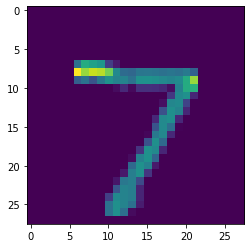

In [16]:
plt.imshow(x_test[0])
plt.show()